<a href="https://colab.research.google.com/github/astrapi69/DroidBallet/blob/master/NLP_D1_2_LC9_Applications_Text_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><a target="_blank" href="https://learning.constructor.org/"><img src="https://drive.google.com/uc?id=1RNy-ds7KWXFs7YheGo9OQwO3OnpvRSU1" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>

_____

<center>Constructor Academy, 2024</center>

# Document Summarization

The idea of document summarization is a
bit different from keyphrase extraction or topic modeling. In this case, the end result
is still in the form of some document, but with a few sentences based on the length we
might want the summary to be. This is similar to an abstract or an executive summary
in a research paper. The main objective of automated document summarization is
to perform this summarization without involving human input, except for running
computer programs. Mathematical and statistical models help in building and
automating the task of summarizing documents by observing their content and context.

There are two broad approaches to document summarization using automated
techniques. They are described as follows:
- __Extraction-based techniques:__ These methods use mathematical
and statistical concepts like SVD to extract some key subset of the
content from the original document such that this subset of content
contains the core information and acts as the focal point of the entire
document. This content can be words, phrases, or even sentences.
The end result from this approach is a short executive summary of a
couple of lines extracted from the original document. No new content
is generated in this technique, hence the name extraction-based.
- __Abstraction-based techniques:__ These methods are more complex
and sophisticated. They leverage language semantics to create
representations and use natural language generation (NLG)
techniques where the machine uses knowledge bases and semantic
representations to generate text on its own and create summaries
just like a human would write them. Thanks to deep learning, we can
implement these techniques easily but they require a lot of data and
compute.

We will cover extraction based methods here due to constraints of needed a lot of data + compute for abstraction based methods. But you can leverage the seq2seq models you learnt in language translation on an appropriate dataset to build deep learning based abstractive summarizers

## Install necessary dependencies

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Get Text Document

We use the description of a very popular role-playing game (RPG) Skyrim from
Bethesda Softworks for summarization.

In [ ]:
DOCUMENT = """
The Elder Scrolls V: Skyrim is an action role-playing video game developed by Bethesda Game Studios
and published by Bethesda Softworks. It is the fifth main installment in The Elder Scrolls series,
following The Elder Scrolls IV: Oblivion.
The game's main story revolves around the player character's quest to defeat Alduin the World-Eater,
a dragon who is prophesied to destroy the world. The game is set 200 years after the events of Oblivion
and takes place in the fictional province of Skyrim. Over the course of the game, the player completes
quests and develops the character by improving skills. The game continues the open-world tradition of
its predecessors by allowing the player to travel anywhere in the game world at any time, and to ignore
or postpone the main storyline indefinitely.
The team opted for a unique and more diverse open world than Oblivion's Imperial Province of Cyrodiil,
which game director and executive producer Todd Howard considered less interesting by comparison.
The game was released to critical acclaim, with reviewers particularly mentioning the character advancement
and setting, and is considered to be one of the greatest video games of all time.


The Elder Scrolls V: Skyrim is an action role-playing game, playable from either a first or
third-person perspective. The player may freely roam over the land of Skyrim which is an open world
environment consisting of wilderness expanses, dungeons, cities, towns, fortresses, and villages.
Players may navigate the game world more quickly by riding horses or by utilizing a fast-travel system
which allows them to warp to previously discovered locations. The game's main quest can be completed or
ignored at the player's preference after the first stage of the quest is finished. However, some quests
rely on the main storyline being at least partially completed. Non-player characters (NPCs) populate the
world and can be interacted with in a number of ways: the player may engage them in conversation,
marry an eligible NPC, kill them or engage in a nonlethal "brawl". The player may
choose to join factions which are organized groups of NPCs — for example, the Dark Brotherhood, a band
of assassins. Each of the factions has an associated quest path to progress through. Each city and town
in the game world has jobs that the player can engage in, such as farming.

Players have the option to develop their character. At the beginning of the game, players create
their character by selecting their sex and choosing between one of several races including humans,
orcs, elves, and anthropomorphic cat or lizard-like creatures and then customizing their character's
appearance. Over the course of the game, players improve their character's skills which are numerical
representations of their ability in certain areas. There are eighteen skills divided evenly among the
three schools of combat, magic, and stealth. When players have trained skills enough to meet the
required experience, their character levels up. Health is depleted primarily when the player
takes damage and the loss of all health results in death. Magicka is depleted by the use of spells,
certain poisons and by being struck by lightning-based attacks. Stamina determines the player's
effectiveness in combat and is depleted by sprinting, performing heavy "power attacks"
and being struck by frost-based attacks. Skyrim is the first entry in The Elder Scrolls to
include dragons in the game's wilderness. Like other creatures, dragons are generated randomly in
the world and will engage in combat with NPCs, creatures and the player. Some dragons may attack
cities and towns when in their proximity. The player character can absorb the souls of dragons
in order to use powerful spells called "dragon shouts" or "Thu'um". A regeneration
period limits the player's use of shouts in gameplay.

Skyrim is set around 200 years after the events of The Elder Scrolls IV: Oblivion, although it is
not a direct sequel. The game takes place in Skyrim, a province of the Empire on the continent of
Tamriel, amid a civil war between two factions: the Stormcloaks, led by Ulfric Stormcloak, and the
Imperial Legion, led by General Tullius. The player character is a Dragonborn, a mortal born with
the soul and power of a dragon. Alduin, a large black dragon who returns to the land after being
lost in time, serves as the game's primary antagonist. Alduin is the first dragon created by Akatosh,
one of the series' gods, and is prophesied to destroy and consume the world.
"""

In [ ]:
import re

DOCUMENT = re.sub(r'\n|\r', ' ', DOCUMENT) # remove any extra newlines between sentences
DOCUMENT = re.sub(r' +', ' ', DOCUMENT) # remove any extra spaces between words
DOCUMENT = DOCUMENT.strip()

## Summarization with summa

TextRank implementation for text summarization and keyword extraction in Python 3. Use the library off-the-shelf directly.

In [ ]:
!pip install summa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54389 sha256=d8b54ce0c5d90db13634d9c12e014733884fd08188f4d46b356a4ae2d861960e
  Stored in directory: /root/.cache/pip/wheels/4a/ca/c5/4958614cfba88ed6ceb7cb5a849f9f89f9ac49971616bc919f
Successfully built summa


In [ ]:
from summa.summarizer import summarize

In [ ]:
print(summarize(DOCUMENT, words=75))

The game's main story revolves around the player character's quest to defeat Alduin the World-Eater, a dragon who is prophesied to destroy the world.
Over the course of the game, the player completes quests and develops the character by improving skills.
Each city and town in the game world has jobs that the player can engage in, such as farming.
Over the course of the game, players improve their character's skills which are numerical representations of their ability in certain areas.


In [ ]:
print(summarize(DOCUMENT, ratio=0.2))

The game's main story revolves around the player character's quest to defeat Alduin the World-Eater, a dragon who is prophesied to destroy the world.
Over the course of the game, the player completes quests and develops the character by improving skills.
The game continues the open-world tradition of its predecessors by allowing the player to travel anywhere in the game world at any time, and to ignore or postpone the main storyline indefinitely.
The game's main quest can be completed or ignored at the player's preference after the first stage of the quest is finished.
Each city and town in the game world has jobs that the player can engage in, such as farming.
Over the course of the game, players improve their character's skills which are numerical representations of their ability in certain areas.
Like other creatures, dragons are generated randomly in the world and will engage in combat with NPCs, creatures and the player.


In [ ]:
sentences = nltk.sent_tokenize(DOCUMENT)
len(sentences)

35

This summarization implementation from summa is based on a variation of the popular algorithm called TextRank.

## Basic Text pre-processing

In [ ]:
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces and numbers
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, flags=re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_sentences = normalize_corpus(sentences)
norm_sentences[:3]

array(['elder scrolls v skyrim action roleplaying video game developed bethesda game studios published bethesda softworks',
       'fifth main installment elder scrolls series following elder scrolls iv oblivion',
       'games main story revolves around player characters quest defeat alduin worldeater dragon prophesied destroy world'],
      dtype='<U183')

## Text Representation with Feature Engineering

We will be vectorizing our normalized sentences using the TF-IDF feature engineering
scheme. We keep things simple and don’t filter out any words based on document
frequency. But feel free to try that out and maybe even leverage n-grams as features.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# min_df \ max_df can be int or float
tv = TfidfVectorizer(min_df=0., max_df=1., ngram_range=(1,3), use_idf=True)
dt_matrix = tv.fit_transform(norm_sentences)
dt_matrix = dt_matrix.toarray()

vocab = tv.get_feature_names_out()
print(dt_matrix.shape)
pd.DataFrame(np.round(dt_matrix, 2), columns=vocab)

(35, 978)


,ability,ability certain,ability certain areas,absorb,absorb souls,absorb souls dragons,acclaim,acclaim reviewers,acclaim reviewers particularly,action,...,world quickly riding,world time,world time ignore,worldeater,worldeater dragon,worldeater dragon prophesied,years,years events,years events elder,years events oblivion
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.15,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.16,0.16,0.16,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.18,0.18,0.00,0.21
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.15,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.15,0.15,0.15,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.18,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Extractive Summarization with TextRank

The TextRank summarization algorithm internally uses the popular PageRank
algorithm, which is used by Google for ranking websites and pages. This is used by the
Google search engine when providing relevant web pages based on search queries. To
understand TextRank better, we need to understand some of the concepts surrounding
PageRank. The core algorithm in PageRank is a graph-based scoring or ranking
algorithm, where pages are scored or ranked based on their importance.

Websites and
pages contain further links embedded in them which link to more pages having more
links and this continues across the Internet. This can be represented as a graph-based
model where vertices indicate the web pages and edges indicate links among them. This
can be used to form a voting or recommendation system such so when one vertex links
to another one in the graph it is basically casting a vote.

Vertex importance is decided
not only on the number of votes or edges but also the importance of the vertices that are
connected to it and their importance.

![](https://i.imgur.com/fMyJjUN.png)

We can see that vertex denoting Page C has a higher score than
Page E even if it has fewer edges compared to Page E, because Page B is an important
page connected to Page C.

For textrank we will follow a similar process leveraging pagerank

![](https://i.imgur.com/kkrzeq7.png)

- Tokenize and extract sentences from the document to be
summarized.
- Decide on the number of sentences, k, that we want in the final
summary
- Build a document-term feature matrix using weights like TF-IDF
or Bag of Words.
- Compute a document similarity matrix by multiplying the matrix
by its transpose.
- Use these documents (sentences in our case) as the vertices and
the similarities between each pair of documents as the weight
or score coefficient we talked about earlier and feed them to the
PageRank algorithm.
- Get the score for each sentence.
- Rank the sentences based on score and return the top k sentences.

## Build Similarity Matrix

In [ ]:
pd.DataFrame(np.round(dt_matrix,2), columns=vocab)

,ability,ability certain,ability certain areas,absorb,absorb souls,absorb souls dragons,acclaim,acclaim reviewers,acclaim reviewers particularly,action,...,world quickly riding,world time,world time ignore,worldeater,worldeater dragon,worldeater dragon prophesied,years,years events,years events elder,years events oblivion
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.15,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.16,0.16,0.16,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.18,0.18,0.00,0.21
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.15,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.15,0.15,0.15,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.18,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
similarity_matrix = np.matmul(dt_matrix, dt_matrix.T) # same as cosine similarity
print(similarity_matrix.shape)
np.round(similarity_matrix, 3)

(35, 35)


array([[1.   , 0.097, 0.   , ..., 0.   , 0.   , 0.   ],
       [0.097, 1.   , 0.016, ..., 0.   , 0.   , 0.028],
       [0.   , 0.016, 1.   , ..., 0.03 , 0.05 , 0.118],
       ...,
       [0.   , 0.   , 0.03 , ..., 1.   , 0.021, 0.022],
       [0.   , 0.   , 0.05 , ..., 0.021, 1.   , 0.039],
       [0.   , 0.028, 0.118, ..., 0.022, 0.039, 1.   ]])

In [ ]:
# alternative option call the function directly
# cosine_similarity(dt_matrix) or euclidean distance

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

pd.DataFrame(np.round(cosine_similarity(dt_matrix),2))

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1.00,0.10,0.00,0.03,0.02,0.03,0.01,0.03,0.29,0.01,...,0.07,0.00,0.00,0.00,0.00,0.06,0.02,0.00,0.00,0.00
1,0.10,1.00,0.02,0.03,0.00,0.01,0.00,0.00,0.12,0.00,...,0.13,0.00,0.00,0.00,0.00,0.27,0.00,0.00,0.00,0.03
2,0.00,0.02,1.00,0.00,0.01,0.03,0.01,0.01,0.00,0.02,...,0.02,0.02,0.00,0.02,0.00,0.02,0.00,0.03,0.05,0.12
3,0.03,0.03,0.00,1.00,0.01,0.02,0.03,0.01,0.03,0.01,...,0.02,0.00,0.00,0.00,0.00,0.17,0.10,0.00,0.00,0.00
4,0.02,0.00,0.01,0.01,1.00,0.03,0.01,0.02,0.01,0.01,...,0.00,0.01,0.00,0.03,0.00,0.00,0.01,0.04,0.00,0.00
5,0.03,0.01,0.03,0.02,0.03,1.00,0.02,0.03,0.02,0.01,...,0.00,0.02,0.00,0.01,0.00,0.00,0.01,0.01,0.02,0.01
6,0.01,0.00,0.01,0.03,0.01,0.02,1.00,0.02,0.01,0.04,...,0.00,0.01,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.01
7,0.03,0.00,0.01,0.01,0.02,0.03,0.02,1.00,0.01,0.00,...,0.02,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.03,0.02
8,0.29,0.12,0.00,0.03,0.01,0.02,0.01,0.01,1.00,0.01,...,0.11,0.00,0.00,0.00,0.00,0.07,0.02,0.00,0.00,0.02
9,0.01,0.00,0.02,0.01,0.01,0.01,0.04,0.00,0.01,1.00,...,0.04,0.02,0.12,0.01,0.00,0.01,0.01,0.01,0.02,0.01


## Build Similarity Graph

In [ ]:
import networkx

similarity_graph = networkx.from_numpy_array(similarity_matrix)
similarity_graph

In [ ]:
# removing self connections as every sentence is 100% similar to itself but it is useless
similarity_graph.remove_edges_from(networkx.selfloop_edges(similarity_graph))

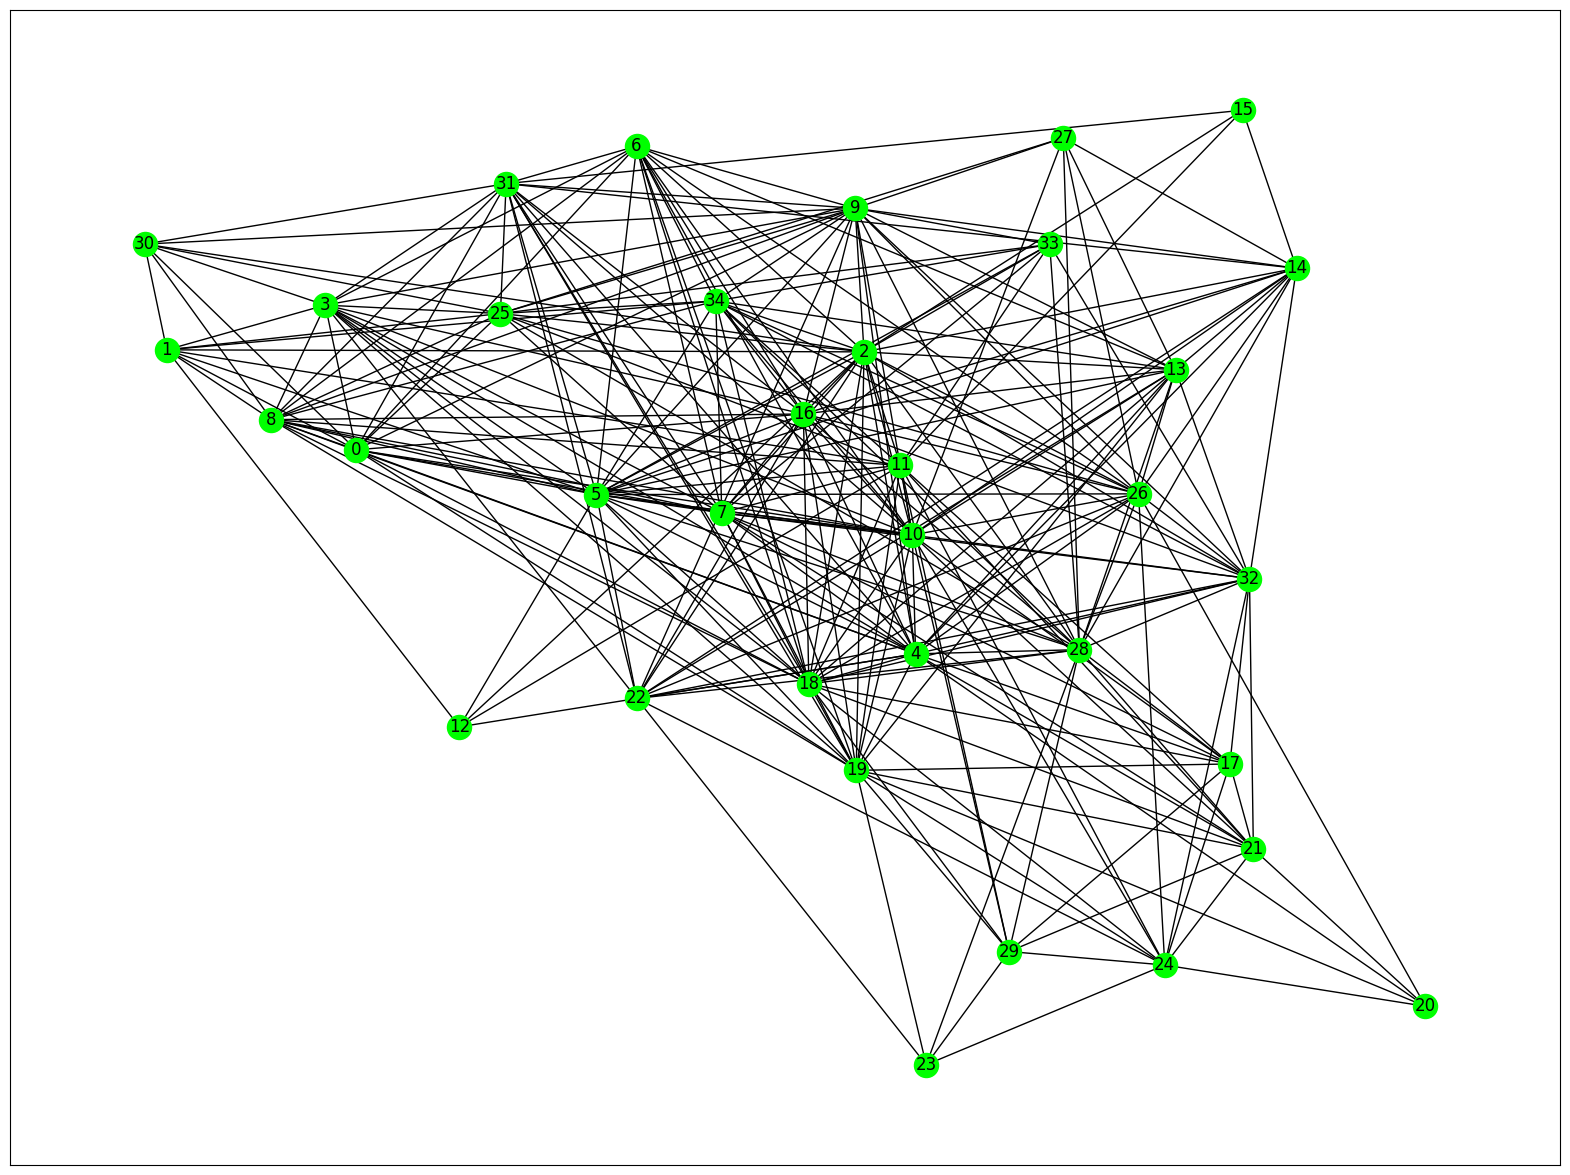

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
networkx.draw_networkx(similarity_graph, node_color='lime')

## Get Sentence Importance Scores

In [ ]:
scores = networkx.pagerank(similarity_graph)
ranked_sentences = sorted(((score, index) for index, score
                                            in scores.items()),
                          reverse=True)
ranked_sentences[:10]

[(0.04462840718492878, 8),
 (0.04321122866218404, 0),
 (0.043205731657241515, 2),
 (0.04198186655500621, 1),
 (0.04047714415162775, 25),
 (0.03993171981856727, 30),
 (0.038559233258643695, 4),
 (0.035152250522949555, 5),
 (0.0350291833683673, 28),
 (0.03457390236035786, 11)]

In [ ]:
num_sentences = 5 # lets assume summary is the top 5 high ranked sentences
top_sentence_indices = [ranked_sentences[index][1]
                        for index in range(num_sentences)]
top_sentence_indices.sort()

In [ ]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

The Elder Scrolls V: Skyrim is an action role-playing video game developed by Bethesda Game Studios and published by Bethesda Softworks.
It is the fifth main installment in The Elder Scrolls series, following The Elder Scrolls IV: Oblivion.
The game's main story revolves around the player character's quest to defeat Alduin the World-Eater, a dragon who is prophesied to destroy the world.
The Elder Scrolls V: Skyrim is an action role-playing game, playable from either a first or third-person perspective.
Skyrim is the first entry in The Elder Scrolls to include dragons in the game's wilderness.
